In [1]:
from conv_model import ConvProtein
from vocab import Vocab
from dataprocessor import *
from utils import *

In [2]:
model = ConvProtein([21,32],[32,64,128,256,512],use_cuda = False)
model.load('./ckpt.21-32-32_64_128_256_512-100.pkl')

loaded model from ./ckpt.21-32-32_64_128_256_512-100.pkl


In [3]:
x,y = get_data('./data/train_fixed.csv')
min_v,max_v = min(y),max(y)

def upscale(v , min_v, max_v):
    return ((v+1) / 2) * (max_v - min_v) + min_v
 
vocab = Vocab()
vocab.from_file()

test_data = pd.read_csv('./data/test.csv')

seq_ids = test_data['seq_id'].values
sequences = test_data['protein_sequence'].values.tolist()

In [4]:
tms =[]
for batch in export_sequences(sequences,vocab,shape=[60,60]):
    out = model.predicts(batch)
    preds = [upscale(v,min_v,max_v) for v in out]
    tms.extend(preds)

(array([   2.,    6.,   10.,   45.,  490., 1514.,  283.,   55.,    6.,
           2.]),
 array([45.10034209, 45.76438474, 46.42842739, 47.09247004, 47.75651268,
        48.42055533, 49.08459798, 49.74864063, 50.41268327, 51.07672592,
        51.74076857]),
 <a list of 10 Patch objects>)

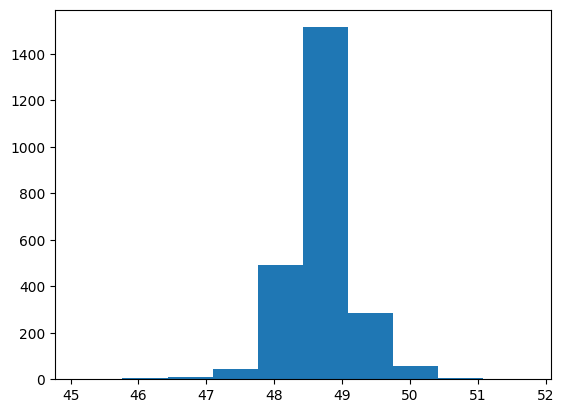

In [5]:
import matplotlib.pyplot as plt 

plt.hist(tms)